In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import exposure
from google.colab.patches import cv2_imshow
#importing all the libraries that may be required

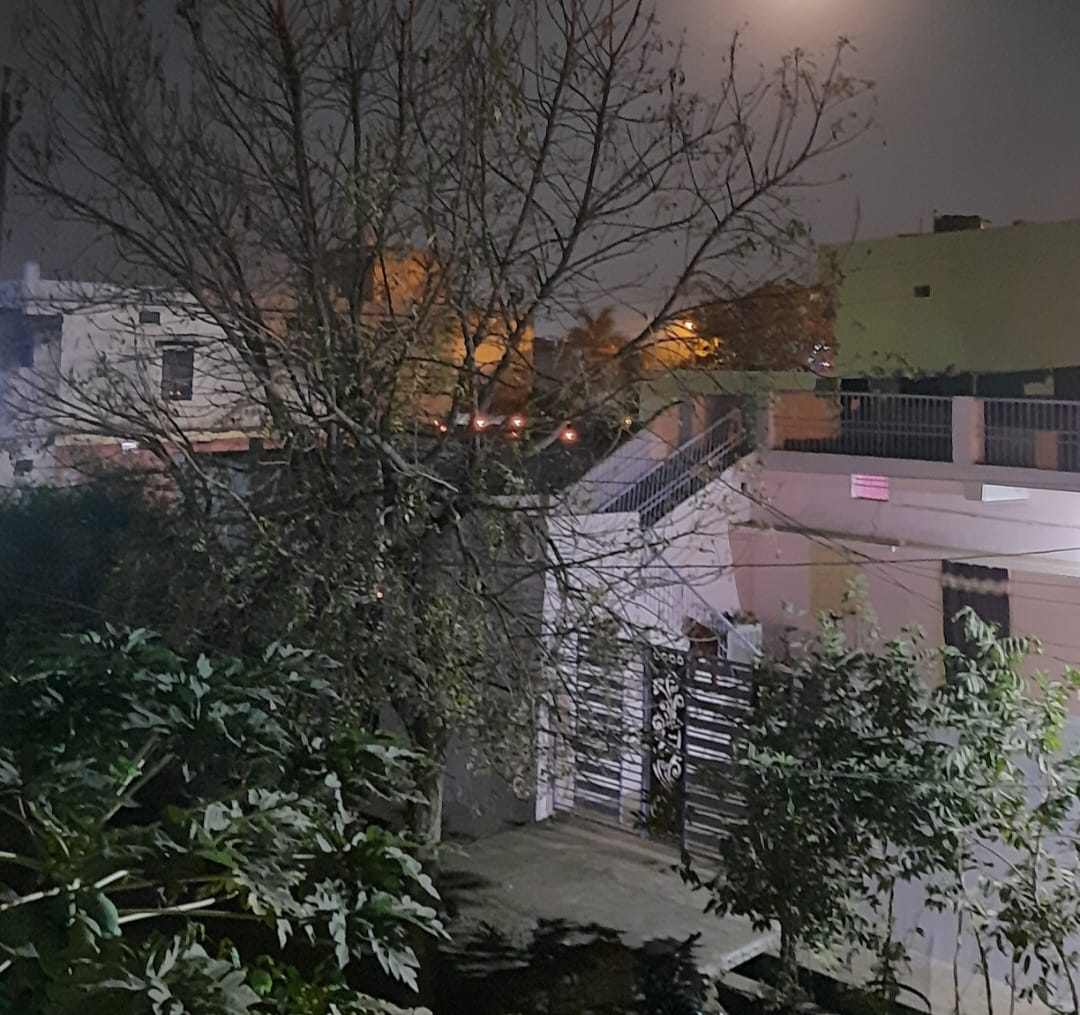

In [ ]:
#question1
nightshot=cv2.imread('nightshot.jpeg', cv2.IMREAD_UNCHANGED)
cv2_imshow(nightshot)
#importing img

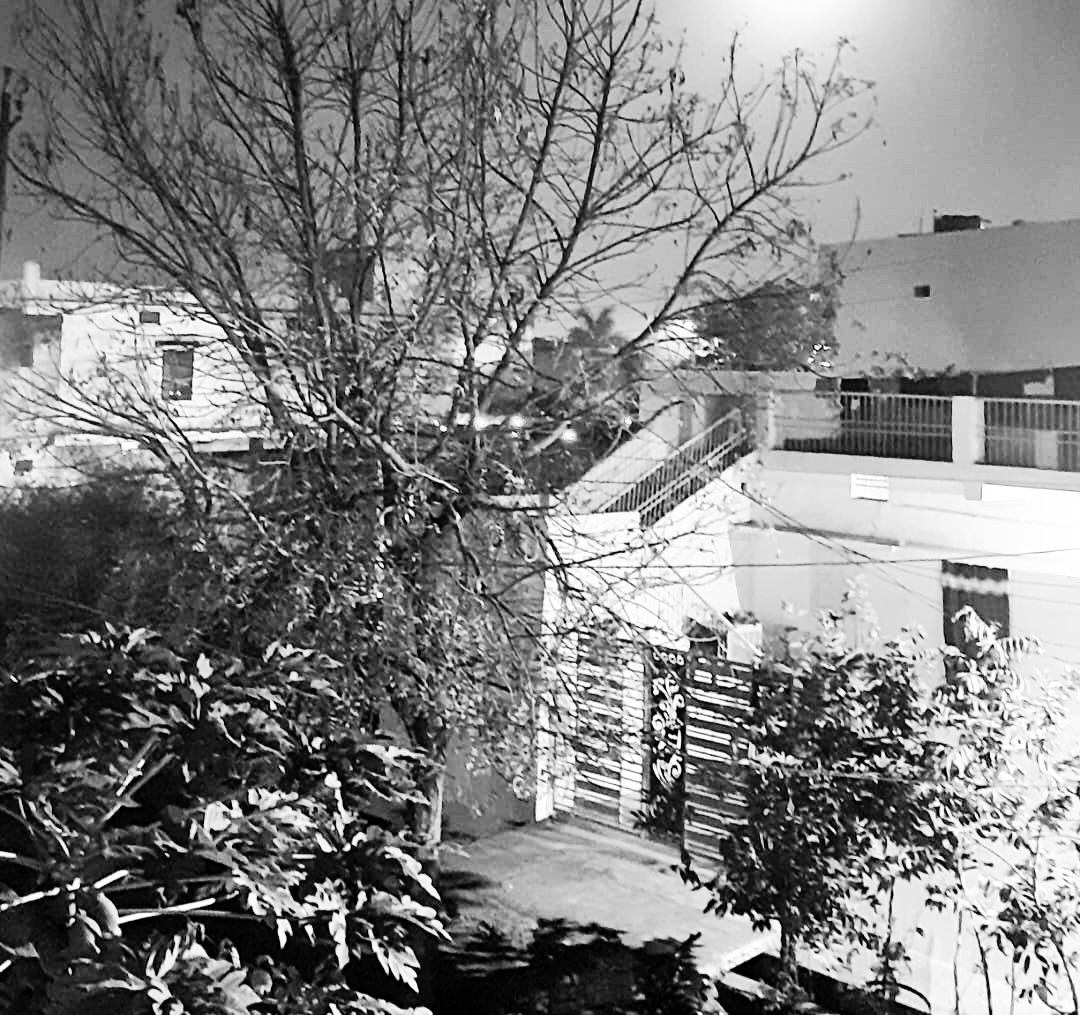

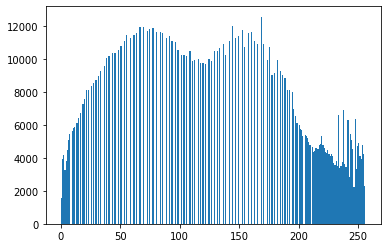

In [ ]:
#question 1
q1=nightshot.copy()
gray_image=cv2.cvtColor(q1, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray_image) #just a command of open cv for histogram equalizing
cv2_imshow(equ)
plt.hist(equ.ravel(),256,[0,256])
plt.show()
#did histogram manipulation

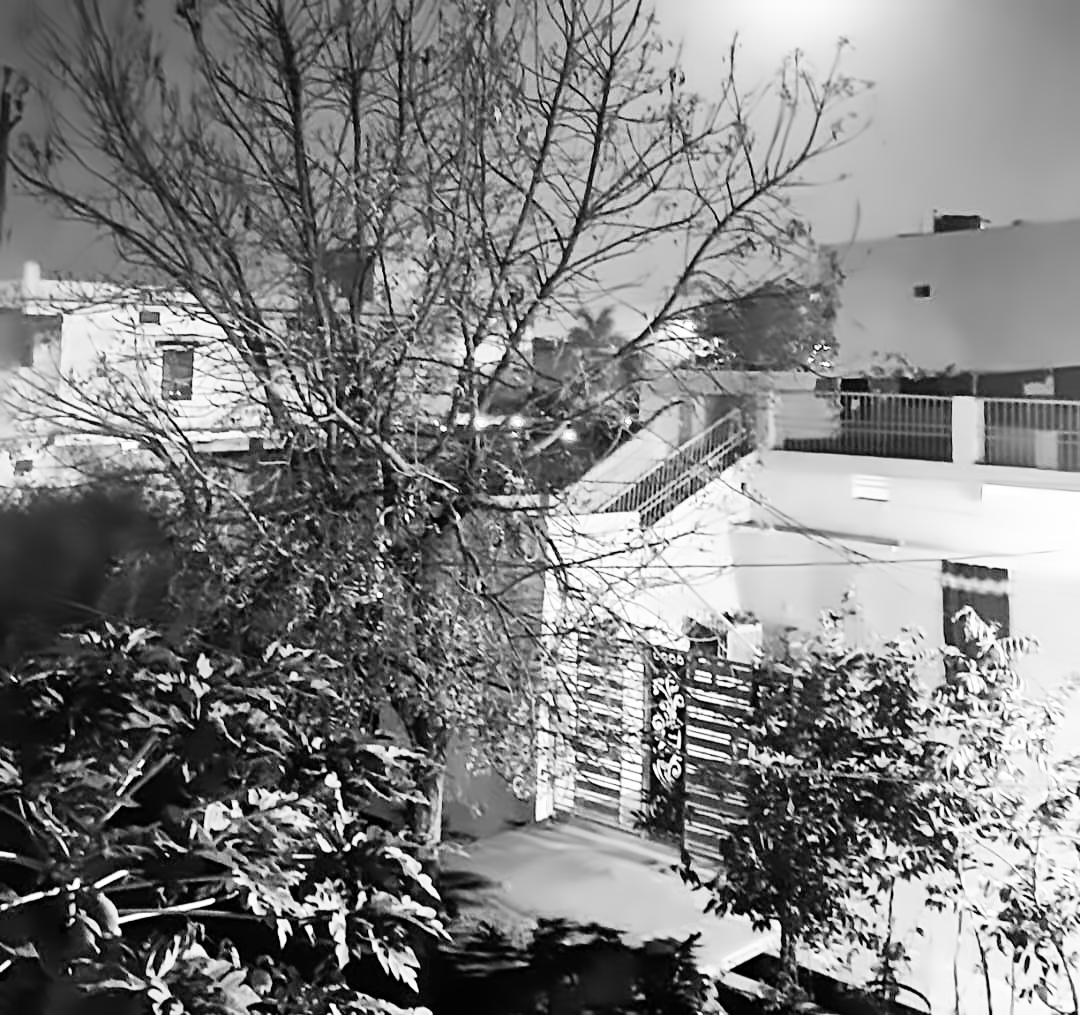

In [ ]:
#question1
dst = cv2.fastNlMeansDenoising(equ,31,10,21)
cv2_imshow(dst)
#performed denoising
#https://stackoverflow.com/questions/59424253/weird-behavior-of-cv2-fastnlmeansdenoising
#https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html

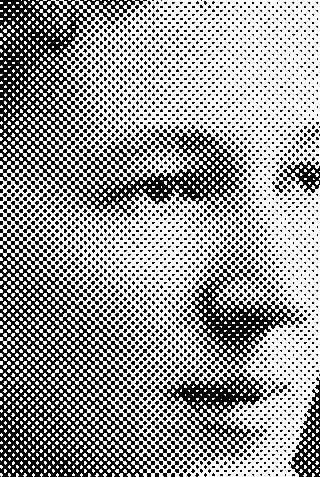

In [ ]:
#question 2
q2=cv2.imread('newspaper-dots.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(q2)
#importing image

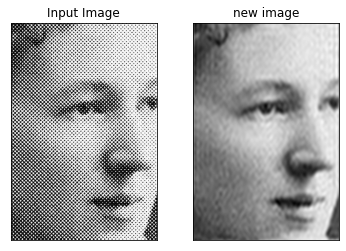

In [ ]:
#question 2
img_float32 = np.float32(q2)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) #calculating dft
dft_shift = np.fft.fftshift(dft) #dft shifting

rows, cols = q2.shape # calculating rows columns of image
crow, ccol = int(rows/2) , int(cols/2)     # calculating center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1 # setting all these values +-30 from centre to 1 that is whereever i was getting bright spots in fft i am chaning it

# apply mask and inverse DFT
fshift = dft_shift*mask #calculating new  dft
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
#above 3 lines are for calculating inverse

plt.subplot(121),plt.imshow(q2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('new image'), plt.xticks([]), plt.yticks([])
plt.show()
#above lines for printing image
# refrence https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Fourier_Transform_FFT_DFT.php


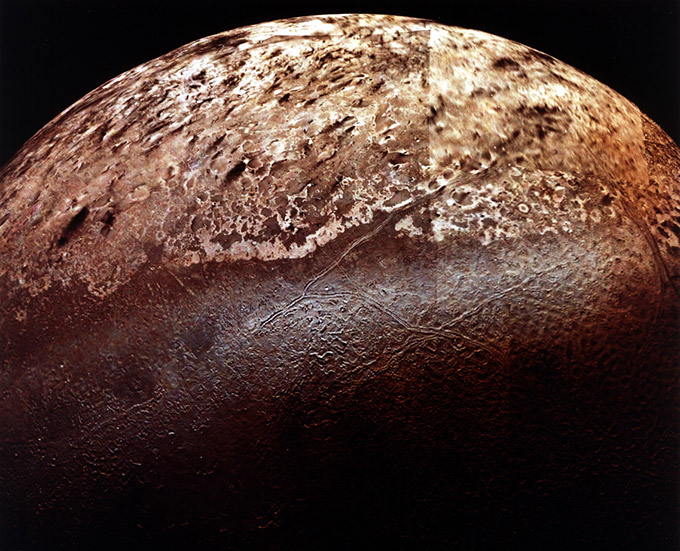

In [ ]:
#question 3
q3=cv2.imread('triton_voyager2.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(q3)

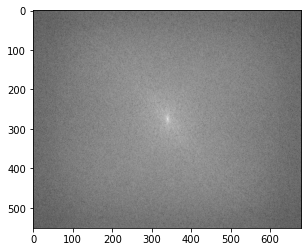

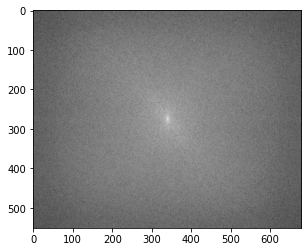

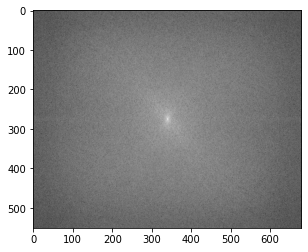

In [ ]:
#question 3


# for each of red green and blue
#i am calcuting dft as done in question 2 and plotting them
q3f0= np.float32(q3[:,:,0])
dft30= cv2.dft(q3f0, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift30= np.fft.fftshift(dft30)
magnitude_spectrum0= 20*np.log(cv2.magnitude(dft_shift30[:,:,0],dft_shift30[:,:,1]))
plt.imshow(magnitude_spectrum0, cmap = 'gray')
plt.show()

q3f1= np.float32(q3[:,:,1])
dft31= cv2.dft(q3f1, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift31= np.fft.fftshift(dft31)
magnitude_spectrum1= 20*np.log(cv2.magnitude(dft_shift31[:,:,0],dft_shift31[:,:,1]))
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.show()

q3f2= np.float32(q3[:,:,2])
dft32= cv2.dft(q3f2, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift32= np.fft.fftshift(dft32)
magnitude_spectrum2= 20*np.log(cv2.magnitude(dft_shift32[:,:,0],dft_shift32[:,:,1]))
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.show()
#after plotting them what i observe is corresponding to that vertical artifact i am getting horizontal line in dft
#so i will change its value to zero

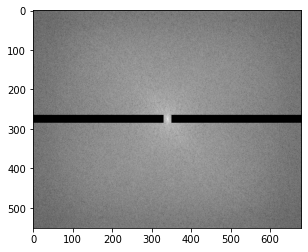

In [ ]:
#question 3
rows0,cols0= q3[:,:,0].shape
crow0, ccol0 = int(rows0/2) , int(cols0/2)
dftnew0=dft_shift30
mask0= np.ones((rows0, cols0, 2), np.uint8)
mask0[crow0-10:crow0+10,0:ccol0-10] = 0
mask0[crow0-10:crow0+10,ccol0+10:] = 0
dftnew0= dft_shift30*mask0
magnitude_spectrum0a= 20*np.log(cv2.magnitude(dftnew0[:,:,0],dftnew0[:,:,1])+1)
plt.imshow(magnitude_spectrum0a, cmap = 'gray')
plt.show()

f_ishift0= np.fft.ifftshift(dftnew0)
img_back0= cv2.idft(f_ishift0)
img_back0= cv2.magnitude(img_back0[:,:,0],img_back0[:,:,1])
#for blue
# masking as said in explanation in above code block
#claculated inverse of updated dft
#code completely written by me
#using syntax of functions from question 2

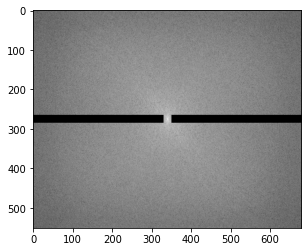

In [ ]:
#question 3
rows1,cols1= q3[:,:,1].shape
crow1, ccol1 = int(rows1/2) , int(cols1/2)

mask1= np.ones((rows1, cols1, 2), np.uint8)
mask1[crow1-10:crow1+10,0:ccol1-10] = 0
mask1[crow1-10:crow1+10,ccol1+10:] = 0


dftnew1= dft_shift31*mask1
magnitude_spectrum1a= 20*np.log(cv2.magnitude(dftnew1[:,:,0],dftnew1[:,:,1])+1)
plt.imshow(magnitude_spectrum1a, cmap = 'gray')
plt.show()

f_ishift1= np.fft.ifftshift(dftnew1)
img_back1= cv2.idft(f_ishift1)
img_back1= cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

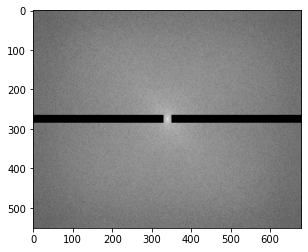

In [ ]:
#question 3
rows2,cols2= q3[:,:,2].shape
crow2, ccol2 = int(rows2/2) , int(cols2/2)     # center

mask2= np.ones((rows2, cols2, 2), np.uint8)
mask2[crow2-10:crow2+10,0:ccol2-10] = 0
mask2[crow2-10:crow2+10,ccol2+10:] = 0

dftnew2=dft_shift32*mask2
magnitude_spectrum2a= 20*np.log(cv2.magnitude(dftnew2[:,:,0],dftnew2[:,:,1])+1)
plt.imshow(magnitude_spectrum2a, cmap = 'gray')
plt.show()

f_ishift2= np.fft.ifftshift(dftnew2)
img_back2= cv2.idft(f_ishift2)
img_back2= cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1])



In [ ]:
#question 3
img_back0=img_back0*255/(np.max(img_back0))
img_back1=img_back1*255/(np.max(img_back1))
img_back2=img_back2*255/(np.max(img_back2))
#scaling r rg and b values so that they can get printed
rgb_img = cv2.merge((img_back0,img_back1,img_back2))
#rgb_img=np.dstack((img_back0,img_back1,img_back2))
#merging r g and b value


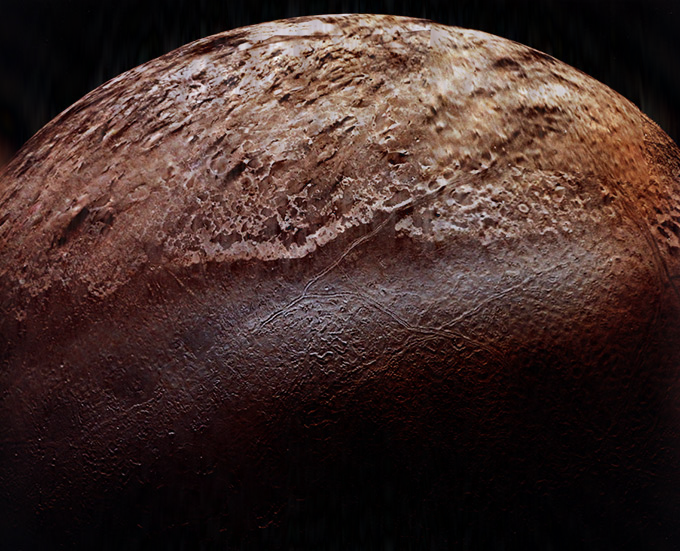

In [ ]:

cv2_imshow(rgb_img)
#question 3 final output
#with artifact removed

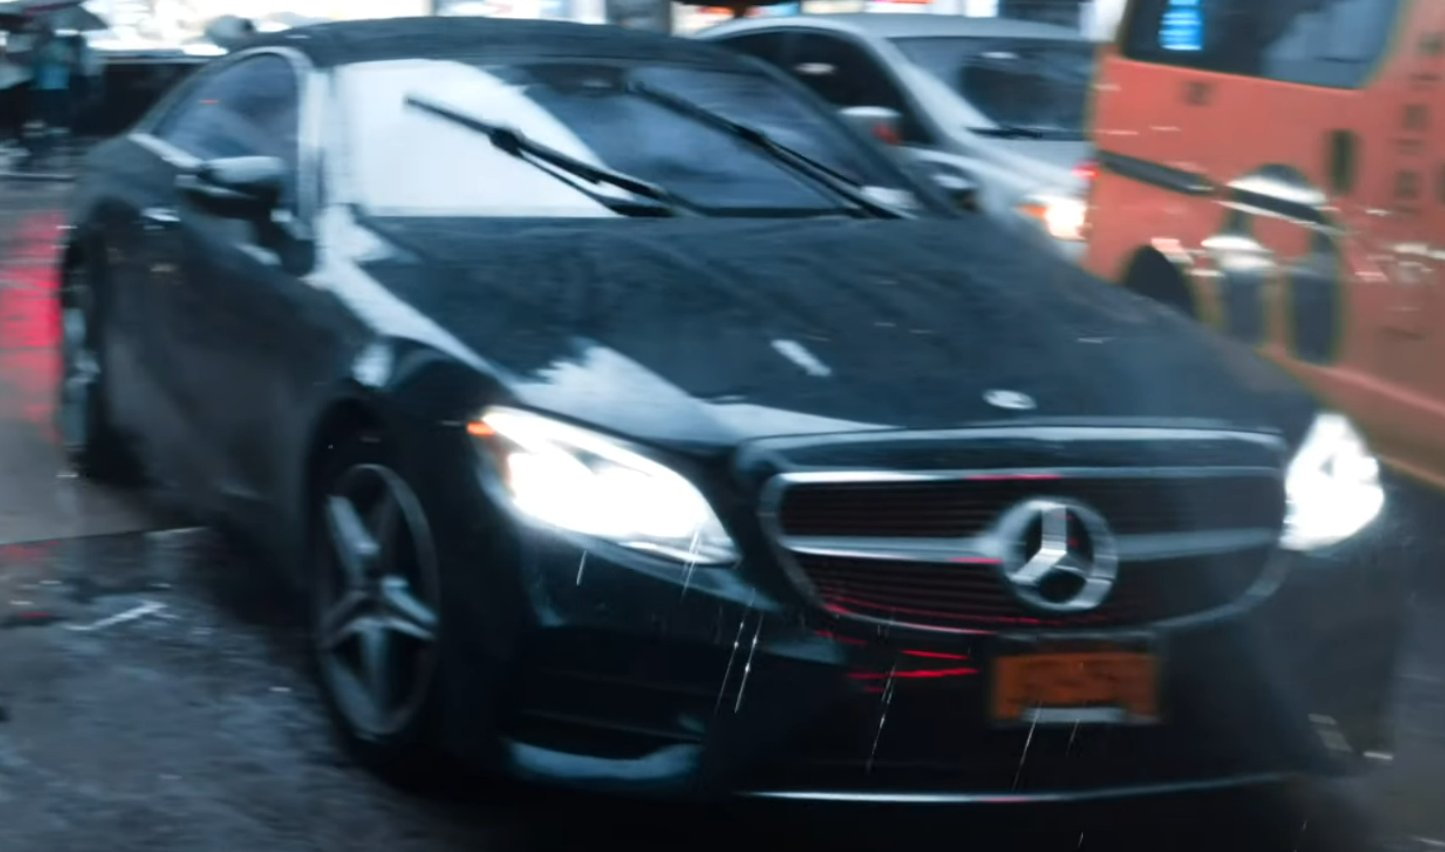

In [ ]:
#question 4
q4=cv2.imread('MakeNumberPlateReadable.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(q4)

In [ ]:
#question 4
from skimage import color, data, restoration
img = color.rgb2gray(q4)
from scipy.signal import convolve2d
psf = np.zeros((21,21))
for i in range(10,21):
  psf[10][i]=1
img = convolve2d(img, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf,1100)
#using already inbuilt function from skiimage and using wiener filter
#tring hit and trial on parameters psf and kernel value
#in psf putting values 1 in direction opposite to direction of motion
#refrence https://stackoverflow.com/questions/35192550/wiener-filter-for-image-deblur

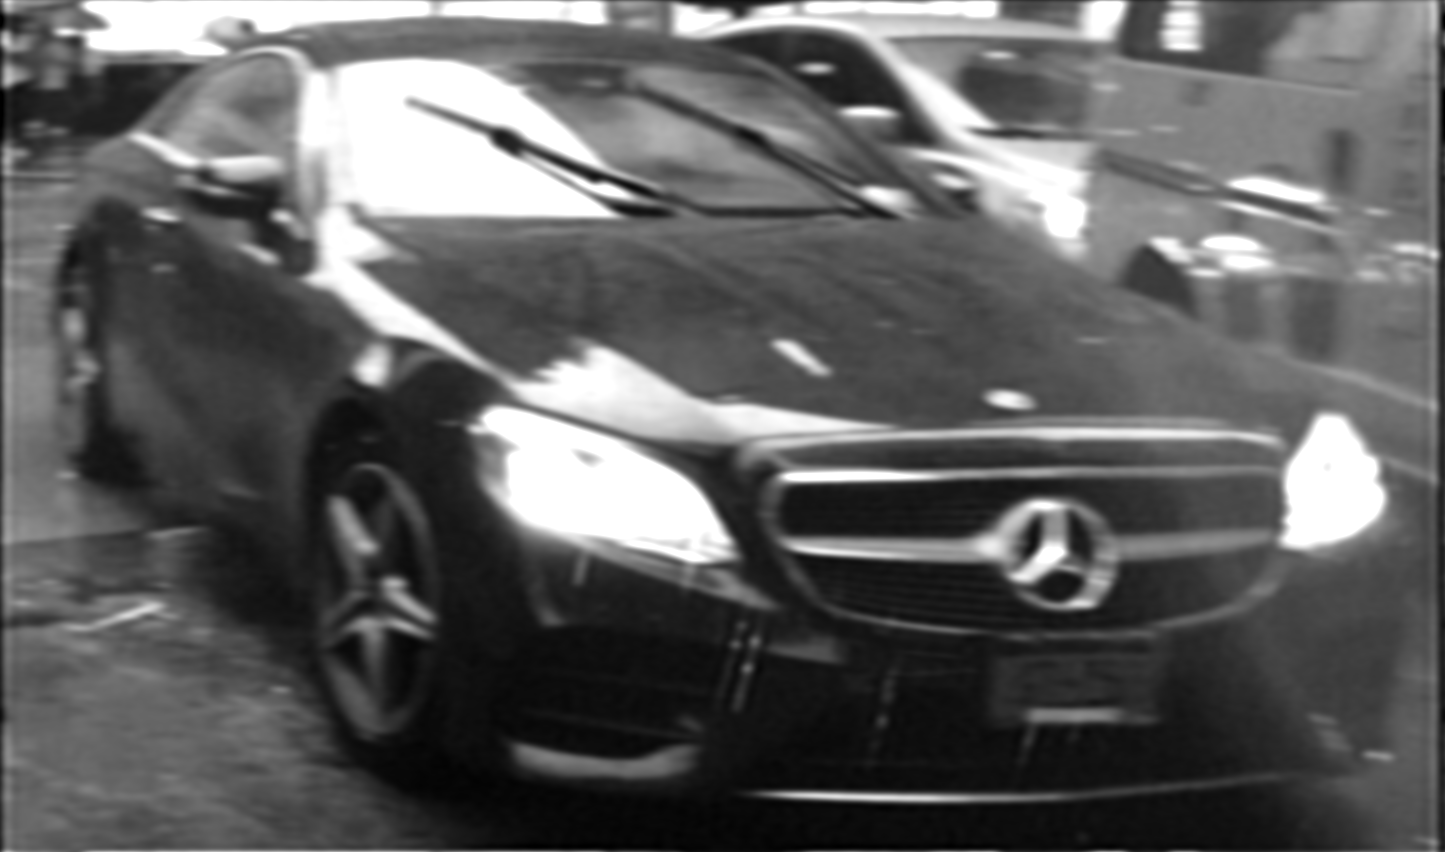

In [ ]:
#question 4
cv2_imshow(deconvolved_img*300)

In [ ]:
# question 5


In [ ]:
g1=cv2.imread('g1.jpg',0)
g2=cv2.imread('g2.jpg',0)
g3=cv2.imread('g3.jpg',0)
g4=cv2.imread('g4.jpg',0)
b1=cv2.imread('b1.jpg',0)
b2=cv2.imread('b2.jpg',0)
b3=cv2.imread('b3.jpg',0)


In [ ]:
#question 5 a
good_img=[g1,g2,g3,g4]
bad_img=[b1,b2,b3]

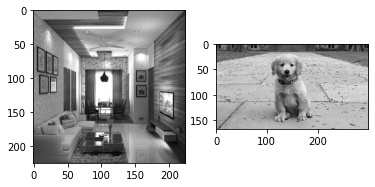

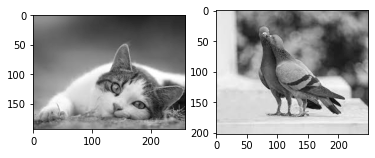

In [ ]:
#good images
plt.subplot(121),plt.imshow(g1,cmap='gray')
plt.subplot(122),plt.imshow(g2,cmap='gray')
plt.show()
plt.subplot(121),plt.imshow(g3,cmap='gray')
plt.subplot(122),plt.imshow(g4,cmap='gray')
plt.show()

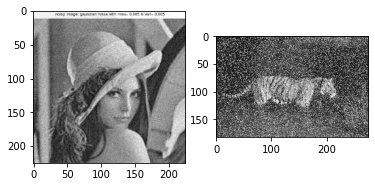

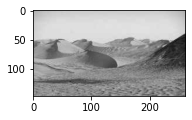

In [ ]:
#bad images
plt.subplot(121),plt.imshow(b1,cmap='gray')
plt.subplot(122),plt.imshow(b2,cmap='gray')
plt.show()
plt.subplot(121),plt.imshow(b3,cmap='gray')
plt.show()

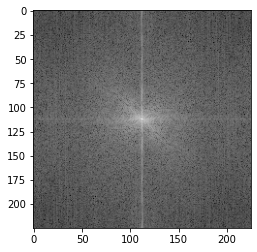

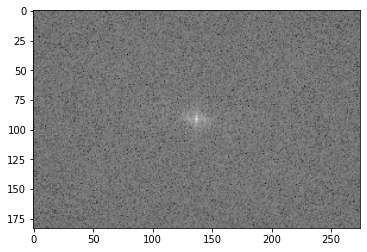

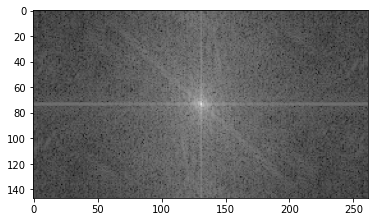

In [ ]:
# question 5 b
#calculating fourier transforms for each of the bad images
#code same as in question 2
b1a=np.float32(b1)
dftb1= cv2.dft(b1a, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shiftb1= np.fft.fftshift(dftb1)
magnitude_spectrum0= 20*np.log(cv2.magnitude(dft_shiftb1[:,:,0],dft_shiftb1[:,:,1])+1)
plt.imshow(magnitude_spectrum0, cmap = 'gray')
plt.show()

b2a=np.float32(b2)
dftb2= cv2.dft(b2a, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shiftb2= np.fft.fftshift(dftb2)
magnitude_spectrum0= 20*np.log(cv2.magnitude(dft_shiftb2[:,:,0],dft_shiftb2[:,:,1])+1)
plt.imshow(magnitude_spectrum0, cmap = 'gray')
plt.show()

b3a=np.float32(b3)
dftb1= cv2.dft(b3a, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shiftb3= np.fft.fftshift(dftb1)
magnitude_spectrum0= 20*np.log(cv2.magnitude(dft_shiftb3[:,:,0],dft_shiftb3[:,:,1])+1)
plt.imshow(magnitude_spectrum0, cmap = 'gray')
plt.show()
# by observing the fourier transforms we can conclude that b1 has gaussian noise, b2 has salt and pepper noise , b3 must have low contarst

In [ ]:
#question 5 c
train=[g1,g2,g3]
valid=[g4,]

In [ ]:
#question 5 d
row,col=g1.shape
mean = 0
var = 10
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, (225, 224))
g1_withnoise=g1+gaussian
#added gausian noise to good image no.1


In [ ]:
#question 5 d
#adding salt noise to good image no 2
import random
import cv2

def add_noise(img):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly picking some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img
g2_withnoise=add_noise(g2)
#refrence https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/